In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1,1)

y = np.array([0,0,0,0,1,1,1,1,1,1])

In [3]:
len(x)

10

In [4]:
len(y)

10

In [5]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [6]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
model.classes_

array([0, 1])

In [10]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [11]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [12]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [13]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [14]:
model.score(x, y)

0.9

In [15]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

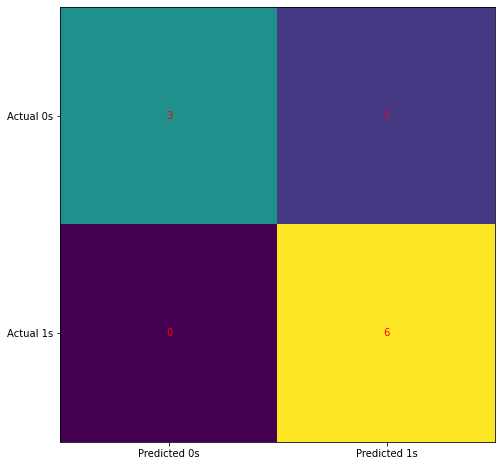

In [16]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [19]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


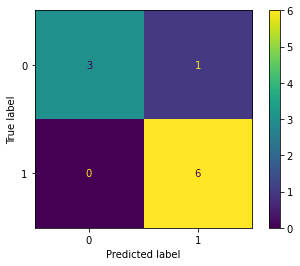

In [20]:
plot_confusion_matrix(model, x, y)

## Improving the Model

In [21]:
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [22]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [23]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [24]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [25]:
model.score(x, y)

1.0

In [26]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [27]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Handwriting Recognition

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
x, y = load_digits(return_X_y=True)

In [30]:
print(x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [31]:
print(y)

[0 1 2 ... 8 9 8]


In [32]:
len(x)

1797

In [33]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
x_train.shape

(1437, 64)

In [36]:
x_test.shape

(360, 64)

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [38]:
x_train[0]

array([ 0.        , -0.33790435, -1.09141592, -0.64913206,  0.73480922,
       -0.6782652 , -0.40764783, -0.12238102, -0.05576317, -0.62606288,
       -0.99058772,  0.99749054,  0.13213489, -1.19579353, -0.51556231,
       -0.12605859, -0.03733267, -0.72296123,  0.55610538,  1.38118964,
       -0.98465664, -1.26284019, -0.55465252, -0.11565628, -0.02638899,
       -0.15208278,  1.10759523,  0.37163491, -1.60830723, -1.28974179,
       -0.63555933, -0.04573894,  0.        , -0.10276083,  1.32734049,
        0.31000002, -1.05452978, -0.80512633, -0.83498919,  0.        ,
       -0.05806465,  0.13008703,  1.23225418,  1.35913603,  1.32341669,
        1.01539823,  1.51779287,  3.19368333, -0.03963009, -0.40398151,
        0.25100815,  1.22276113, -0.47996928, -0.96182318,  2.3466476 ,
        6.15487177, -0.02638899, -0.30140625, -1.0865776 , -1.14418634,
        0.65337948,  1.58325794,  3.53125595,  3.30213343])

In [39]:
scaler.var_

array([0.00000000e+00, 8.55050124e-01, 2.28863106e+01, 1.83974423e+01,
       1.81377348e+01, 3.21097915e+01, 1.09339085e+01, 1.05929145e+00,
       7.63110730e-03, 1.01272900e+01, 2.97719443e+01, 1.56526611e+01,
       2.31709483e+01, 3.65247343e+01, 1.24966941e+01, 5.71982437e-01,
       1.38985137e-03, 1.27390164e+01, 3.20208894e+01, 3.35601929e+01,
       3.85917600e+01, 3.85278665e+01, 1.02358718e+01, 1.72363847e-01,
       6.95409955e-04, 9.73856847e+00, 3.87991432e+01, 3.46591992e+01,
       3.80330368e+01, 3.40198434e+01, 1.36235963e+01, 2.08332425e-03,
       0.00000000e+00, 1.21631395e+01, 3.97855377e+01, 3.88890652e+01,
       3.55724226e+01, 3.47987558e+01, 1.26287145e+01, 0.00000000e+00,
       2.42744564e-02, 9.00625433e+00, 4.27738150e+01, 4.16067525e+01,
       3.92735368e+01, 3.20304779e+01, 1.87051467e+01, 9.23955759e-02,
       5.21102254e-02, 3.23418221e+00, 3.22067208e+01, 2.75217865e+01,
       2.77759172e+01, 3.63233579e+01, 2.35085708e+01, 8.92148986e-01,
      

In [40]:
scaler.mean_

array([0.00000000e+00, 3.12456507e-01, 5.22129436e+00, 1.17842728e+01,
       1.18705637e+01, 5.84342380e+00, 1.34794711e+00, 1.25956855e-01,
       4.87125957e-03, 1.99234516e+00, 1.04050104e+01, 1.20535839e+01,
       1.03639527e+01, 8.22686152e+00, 1.82254697e+00, 9.53375087e-02,
       1.39178845e-03, 2.58037578e+00, 9.85316632e+00, 6.99860821e+00,
       7.11691023e+00, 7.83855254e+00, 1.77453027e+00, 4.80167015e-02,
       6.95894224e-04, 2.47459986e+00, 9.10090466e+00, 8.81210856e+00,
       9.91858038e+00, 7.52261656e+00, 2.34585943e+00, 2.08768267e-03,
       0.00000000e+00, 2.35838553e+00, 7.62769659e+00, 9.06680585e+00,
       1.02894920e+01, 8.74947808e+00, 2.96729297e+00, 0.00000000e+00,
       9.04662491e-03, 1.60960334e+00, 6.94084899e+00, 7.23312457e+00,
       7.70633264e+00, 8.25330550e+00, 3.43562978e+00, 2.92275574e-02,
       9.04662491e-03, 7.26513570e-01, 7.57550452e+00, 9.58524704e+00,
       9.52957550e+00, 8.79679889e+00, 3.62212944e+00, 1.86499652e-01,
      

In [41]:
model = LogisticRegression(solver="liblinear", C=0.05, multi_class="ovr", random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [42]:
y_pred = model.predict(x_test)

In [43]:
model.score(x_train, y_train)

0.964509394572025

In [44]:
model.score(x_test, y_test)

0.8805555555555555

In [45]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  3, 28,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  0, 23,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  3,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  4,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 10, 30]], dtype=int64)

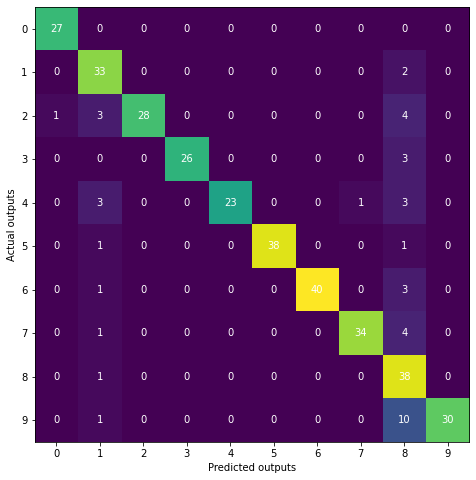

In [46]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted outputs", color="black")
ax.set_ylabel("Actual outputs", color="black")
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.75      0.94      0.84        35
           2       1.00      0.78      0.88        36
           3       1.00      0.90      0.95        29
           4       1.00      0.77      0.87        30
           5       1.00      0.95      0.97        40
           6       1.00      0.91      0.95        44
           7       0.97      0.87      0.92        39
           8       0.56      0.97      0.71        39
           9       1.00      0.73      0.85        41

    accuracy                           0.88       360
   macro avg       0.92      0.88      0.89       360
weighted avg       0.92      0.88      0.89       360



# KNN

In [48]:
weather = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]

temp = ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"]

play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]

In [49]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [50]:
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)

In [51]:
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [52]:
weather

['Sunny',
 'Sunny',
 'Overcast',
 'Rainy',
 'Rainy',
 'Rainy',
 'Overcast',
 'Sunny',
 'Sunny',
 'Rainy',
 'Sunny',
 'Overcast',
 'Overcast',
 'Rainy']

In [53]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model = KNeighborsClassifier(n_neighbors =3)

model.fit(features, label)

predicted = model.predict([[0,2]])
predicted

array([1], dtype=int64)

## Multiple Labels K-NN

In [56]:
from sklearn import datasets
wine = datasets.load_wine()

In [57]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [58]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [59]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [60]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [61]:
wine.data.shape

(178, 13)

In [62]:
wine.target.shape

(178,)

In [63]:
X_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(x_test)

In [65]:
from sklearn import metrics

In [66]:
metrics.accuracy_score(y_test, y_pred)

0.6481481481481481

In [67]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(x_test)

In [68]:
metrics.accuracy_score(y_test, y_pred)

0.6851851851851852

In [69]:
error = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

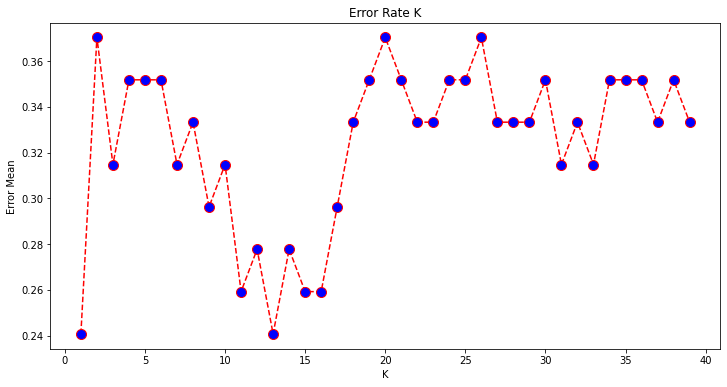

In [70]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color="red",linestyle="dashed",marker="o",markerfacecolor="blue",markersize=10)
plt.title("Error Rate K")
plt.xlabel("K")
plt.ylabel("Error Mean")
plt.show()

In [71]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)

y_pred = knn.predict(x_test)

In [72]:
metrics.accuracy_score(y_test,y_pred)

0.7592592592592593